<a href="https://colab.research.google.com/github/brempong21/Data-Science-Salaries/blob/main/model(data_salaries).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/brempong21/Data-Science-Salaries/main/encoded.csv')
df.head(5)

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size,job_title_encoded,experience_level_encoded,employment_type_encoded,work_models_encoded,employee_residence_encoded,salary_currency_encoded,company_location_encoded,company_size_encoded
0,46,2,2,2,2024,84,148100,20,148100,73,1,46,2,2,2,84,20,73,1
1,46,2,2,2,2024,84,98700,20,98700,73,1,46,2,2,2,84,20,73,1
2,73,3,2,2,2024,84,140032,20,140032,73,1,73,3,2,2,84,20,73,1
3,73,3,2,2,2024,84,100022,20,100022,73,1,73,3,2,2,84,20,73,1
4,19,2,2,1,2024,84,120000,20,120000,73,1,19,2,2,1,84,20,73,1


In [3]:
df.describe()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size,job_title_encoded,experience_level_encoded,employment_type_encoded,work_models_encoded,employee_residence_encoded,salary_currency_encoded,company_location_encoded,company_size_encoded
count,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6.599000e+03,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000
mean,61.064555,2.412335,1.994848,1.353993,2022.818457,77.174723,1.792833e+05,18.454917,145560.558569,67.260191,0.939536,61.064555,2.412335,1.994848,1.353993,77.174723,18.454917,67.260191,0.939536
std,31.303873,0.912763,0.125442,0.544903,0.674809,19.161933,5.263722e+05,4.336874,70946.838070,16.571706,0.329161,31.303873,0.912763,0.125442,0.544903,19.161933,4.336874,16.571706,0.329161
min,0.000000,0.000000,0.000000,0.000000,2020.000000,0.000000,1.400000e+04,0.000000,15000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,2.000000,2.000000,1.000000,2023.000000,84.000000,9.600000e+04,20.000000,95000.000000,73.000000,1.000000,36.000000,2.000000,2.000000,1.000000,84.000000,20.000000,73.000000,1.000000
50%,47.000000,3.000000,2.000000,1.000000,2023.000000,84.000000,1.400000e+05,20.000000,138666.000000,73.000000,1.000000,47.000000,3.000000,2.000000,1.000000,84.000000,20.000000,73.000000,1.000000
75%,73.000000,3.000000,2.000000,2.000000,2023.000000,84.000000,1.875000e+05,20.000000,185000.000000,73.000000,1.000000,73.000000,3.000000,2.000000,2.000000,84.000000,20.000000,73.000000,1.000000
max,131.000000,3.000000,3.000000,2.000000,2024.000000,86.000000,3.040000e+07,21.000000,750000.000000,74.000000,2.000000,131.000000,3.000000,3.000000,2.000000,86.000000,21.000000,74.000000,2.000000


In [4]:
X = df.drop('salary_in_usd', axis=1)
y = df['salary_in_usd']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (4619, 18)
X_test shape: (1980, 18)
y_train shape: (4619,)
y_test shape: (1980,)


In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

model = RandomForestRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test,y_pred)
print(r2)

0.9593685121128303


In [7]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Decision Tree': DecisionTreeRegressor()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    print(f"{model_name}: R2_SCORE: {round(score, 2)}")


Linear Regression: R2_SCORE: 0.2
Ridge Regression: R2_SCORE: 0.2
Lasso Regression: R2_SCORE: 0.2


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.246e+12, tolerance: 2.160e+09
  model = cd_fast.enet_coordinate_descent(


Random Forest: R2_SCORE: 0.97
Gradient Boosting: R2_SCORE: 0.99
Decision Tree: R2_SCORE: 0.93


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.246e+12, tolerance: 2.160e+09
  model = cd_fast.enet_coordinate_descent(


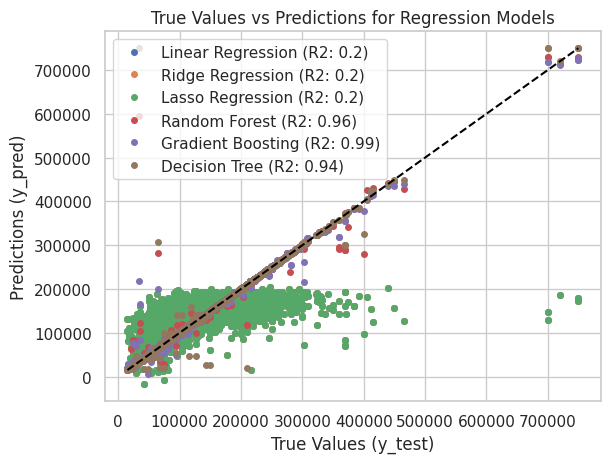

In [8]:
fig, ax = plt.subplots()
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    ax.plot(y_test, y_pred, marker='o', linestyle='', ms=4, label=f'{model_name} (R2: {round(score, 2)})')


ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')
ax.set_xlabel('True Values (y_test)')
ax.set_ylabel('Predictions (y_pred)')
ax.set_title('True Values vs Predictions for Regression Models')

ax.legend()

plt.show()
